# TASK: 1

In [1]:
import numpy as np

In [2]:
class Perceptron():
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        
    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0

        return activation


In [3]:
# Dataset - mimic the behavior of a logical AND.
training_inputs = []
training_inputs.append(np.array([0, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([1, 1]))

# Output labels of logical OR
labels = np.array([0, 1, 1, 1])

# Training
perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

# Prediction
inputs = np.array([1, 1])
print(perceptron.predict(inputs))  # => 1

inputs = np.array([0, 1])
print(perceptron.predict(inputs))  # => ?

1
1


# TASK: 2

In [9]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_units, learning_rate=0.1, epochs=10000):
        self.input_size = input_size
        self.hidden_units = hidden_units
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights and biases for the hidden layer and output layer
        self.weights_hidden = np.random.randn(self.input_size, self.hidden_units)
        self.bias_hidden = np.random.randn(self.hidden_units)
        self.weights_output = np.random.randn(self.hidden_units)
        self.bias_output = np.random.randn()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, inputs):
        # Hidden layer calculation
        hidden_sum = np.dot(inputs, self.weights_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_sum)
        
        # Output layer calculation
        output_sum = np.dot(hidden_output, self.weights_output) + self.bias_output
        output = self.sigmoid(output_sum)
        
        return hidden_output, output

    def backpropagation(self, inputs, hidden_output, output, target):
        # Calculate output layer error and gradient
        output_error = target - output
        output_gradient = output_error * self.sigmoid_derivative(output)
        
        # Calculate hidden layer error and gradient
        hidden_error = np.dot(output_gradient, self.weights_output.T)
        hidden_gradient = hidden_error * self.sigmoid_derivative(hidden_output)
        
        # Update weights and biases
        self.weights_output += self.learning_rate * np.dot(hidden_output.T, output_gradient)
        self.bias_output += self.learning_rate * np.sum(output_gradient)
        self.weights_hidden += self.learning_rate * np.dot(inputs.T, hidden_gradient)
        self.bias_hidden += self.learning_rate * np.sum(hidden_gradient)

    def train(self, inputs, targets):
        for epoch in range(self.epochs):
            for i in range(len(inputs)):
                input_data = inputs[i]
                target = targets[i]

                # Perform forward propagation
                hidden_output, output = self.forward_propagation(input_data)

                # Perform backpropagation
                self.backpropagation(input_data, hidden_output, output, target)

    def predict(self, inputs):
        _, output = self.forward_propagation(inputs)
        return np.round(output)  # Round to 0 or 1 for binary prediction

# XOR Dataset
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

targets = np.array([0, 1, 1, 0])  # XOR output

# Create and train the MLP
mlp = MLP(input_size=2, hidden_units=2, learning_rate=0.1, epochs=10000)
mlp.train(inputs, targets)

# Test
print("Predictions for XOR:")
for input_data in inputs:
    prediction = mlp.predict(input_data)
    print(f"Input: {input_data}, Predicted Output: {int(prediction)}")


Predictions for XOR:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0


# TASK: 3

Model accuracy: 0.9666666666666667


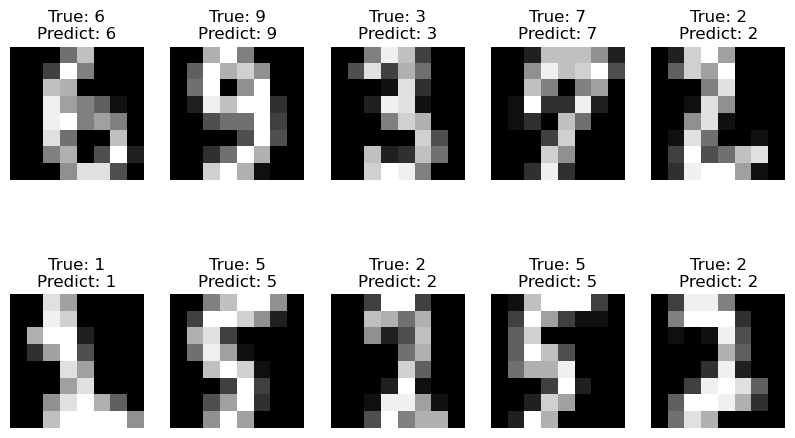

In [7]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
mnist = load_digits()

# Prepare the data
X = mnist.images.reshape((len(mnist.images), -1))  # flatten each image
y = mnist.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Display some example predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(X_test[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"True: {y_test[i]}\nPredict: {y_pred[i]}", fontsize = 12)
    plt.subplots_adjust(hspace=0.8)
    axes[i].axis('off')

plt.show()
